# Exploratory Data Analysis
Author: Group 22

## Import important libraries for data analysis

In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

## Dataset Schema

In [66]:
"""
Files downloaded from: https://grouplens.org/datasets/movielens/1m/

These files contain 1,000,209 anonymous ratings of approximately 3,900 movies made by 6,040 MovieLens users who joined MovieLens in 2000.

"""

"""

ratings.dat:

Field       Description
UserID      Unique identification for each user
MovieID     Unique identification for each movie
Rating      User rating for each movie
Timestamp   Timestamp generated while adding user review


users.data:

Field       Description
UserID      Unique identification for each user
Genre       Category of each movie
Age         User’s age
Occupation  User’s Occupation
Zip-code    Zip Code for the user’s location


movies.dat:

Field       Description
MovieID     Unique identification for each movie
Title       A title for each movie
Genre       Category of each movie


"""

'\n\nratings.dat:\n\nField       Description\nUserID      Unique identification for each user\nMovieID     Unique identification for each movie\nRating      User rating for each movie\nTimestamp   Timestamp generated while adding user review\n\n\nusers.data:\n\nField       Description\nUserID      Unique identification for each user\nGenre       Category of each movie\nAge         User’s age\nOccupation  User’s Occupation\nZip-code    Zip Code for the user’s location\n\n\nmovies.dat:\n\nField       Description\nMovieID     Unique identification for each movie\nTitle       A title for each movie\nGenre       Category of each movie\n\n\n'

In [67]:
ratings = "ratings.dat"
users = "users.dat"
movies = "movies.dat"

## Reading Movielens dataset

In [5]:
df_rating = pd.read_csv(
    ratings,
    sep="::",
    header=None, 
    names=['user_id', 'movie_id', 'rating', 'timestamp']
)



/tmp/ipykernel_886008/1231300361.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_rating = pd.read_csv(


In [6]:
df_user = pd.read_csv(
    users,
    sep="::",
    header=None, 
    names=['user_id', 'gender', 'age', 'occupation', 'zipcode']
)

/tmp/ipykernel_886008/3175063530.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_user = pd.read_csv(


In [7]:
df_movie = pd.read_csv(
    movies, 
    sep='::', 
    header=None, 
    names=['movie_id', 'title', 'genre'], 
    encoding = "ISO-8859-1")

/tmp/ipykernel_886008/484467727.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_movie = pd.read_csv(


## Part 1: Analyzing Rating Data

In [8]:
df_rating.head()

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [9]:
df_user.head()

,user_id,gender,age,occupation,zipcode
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [10]:
df_movie.head()

,movie_id,title,genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [11]:
df_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype
---  ------     --------------    -----
 0   user_id    1000209 non-null  int64
 1   movie_id   1000209 non-null  int64
 2   rating     1000209 non-null  int64
 3   timestamp  1000209 non-null  int64
dtypes: int64(4)
memory usage: 30.5 MB


In [12]:
df_rating['timestamp'] = df_rating['timestamp'].apply(datetime.fromtimestamp)

In [13]:
df_rating['year'] = df_rating['timestamp'].dt.year
df_rating['month'] = df_rating['timestamp'].dt.month
df_rating['date'] = df_rating['timestamp'].dt.date

In [14]:
df_rating.head()

,user_id,movie_id,rating,timestamp,year,month,date
0,1,1193,5,2000-12-31 17:12:40,2000,12,2000-12-31
1,1,661,3,2000-12-31 17:35:09,2000,12,2000-12-31
2,1,914,3,2000-12-31 17:32:48,2000,12,2000-12-31
3,1,3408,4,2000-12-31 17:04:35,2000,12,2000-12-31
4,1,2355,5,2001-01-06 18:38:11,2001,1,2001-01-06


In [15]:
print("Number of unique users: ", df_rating["user_id"].nunique())
print("Number of unique movies: ", df_rating["movie_id"].nunique())

Number of unique users:  6040
Number of unique movies:  3706


In [16]:
print("Unique ratings: ", df_rating["rating"].unique())
print("Average rating: ", df_rating["rating"].mean())


Unique ratings:  [5 3 4 2 1]
Average rating:  3.581564453029317


In [17]:
print('Frequency of each rating value:')
print(df_rating['rating'].value_counts())

Frequency of each rating value:
4    348971
3    261197
5    226310
2    107557
1     56174
Name: rating, dtype: int64


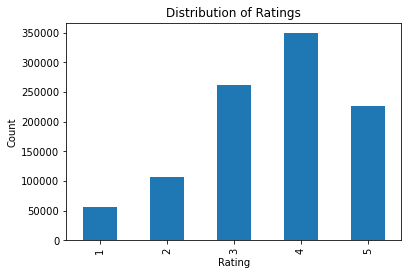

In [18]:
# Get value counts of the "rating" column
rating_counts = df_rating['rating'].value_counts().sort_index()

# Create a bar plot of the value counts
rating_counts.plot.bar()

# Add x and y axis labels
plt.xlabel('Rating')
plt.ylabel('Count')

# Add a title to the plot
plt.title('Distribution of Ratings')

# Display the plot
plt.show()

In [19]:
# Group ratings by year and count the number of ratings for each year
df_yearly_counts = df_rating.groupby('year')['rating'].count().sort_index()

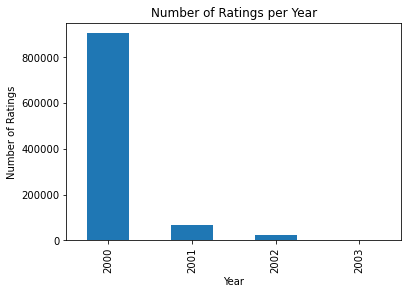

In [20]:
df_yearly_counts.plot.bar()

plt.xlabel('Year')
plt.ylabel('Number of Ratings')

# Add a title to the plot
plt.title('Number of Ratings per Year')

# Display the plot
plt.show()

In [21]:
print('Years:', df_rating.year.unique())
print('Months', df_rating.month.unique())

Years: [2000 2001 2002 2003]
Months [12  1  2  7  5  6  4  3 10  8  9 11]


In [24]:
df_rating_2000 = df_rating.loc[df_rating["year"] == 2000]

In [25]:
df_rating_2000.head()

,user_id,movie_id,rating,timestamp,year,month,date
0,1,1193,5,2000-12-31 17:12:40,2000,12,2000-12-31
1,1,661,3,2000-12-31 17:35:09,2000,12,2000-12-31
2,1,914,3,2000-12-31 17:32:48,2000,12,2000-12-31
3,1,3408,4,2000-12-31 17:04:35,2000,12,2000-12-31
5,1,1197,3,2000-12-31 17:37:48,2000,12,2000-12-31


In [26]:
df_rating_2000.tail()

,user_id,movie_id,rating,timestamp,year,month,date
1000204,6040,1091,1,2000-04-25 22:35:41,2000,4,2000-04-25
1000205,6040,1094,5,2000-04-25 19:21:27,2000,4,2000-04-25
1000206,6040,562,5,2000-04-25 19:19:06,2000,4,2000-04-25
1000207,6040,1096,4,2000-04-25 22:20:48,2000,4,2000-04-25
1000208,6040,1097,4,2000-04-25 22:19:29,2000,4,2000-04-25


In [27]:
ratings_by_month_2000 = df_rating_2000.groupby('month')['rating'].count()

In [28]:
ratings_by_month_2000

month
4      11619
5      67725
6      54661
7      92538
8     179738
9      53149
10     41853
11    290988
12    112525
Name: rating, dtype: int64

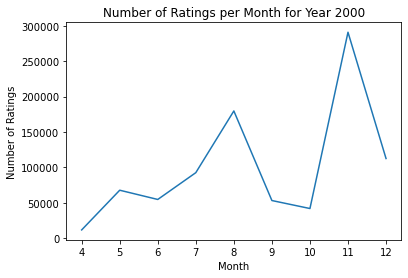

In [29]:
# Create a line plot of the ratings by month
plt.plot(ratings_by_month_2000.index, ratings_by_month_2000.values)

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Number of Ratings')
plt.title('Number of Ratings per Month for Year 2000')

# Display the plot
plt.show()

In [30]:
df_rating_2001 = df_rating.loc[df_rating["year"] == 2001]

In [31]:
df_rating_2001.head()

,user_id,movie_id,rating,timestamp,year,month,date
4,1,2355,5,2001-01-06 18:38:11,2001,1,2001-01-06
10,1,595,5,2001-01-06 18:37:48,2001,1,2001-01-06
16,1,2687,3,2001-01-06 18:37:48,2001,1,2001-01-06
23,1,527,5,2001-01-06 18:36:35,2001,1,2001-01-06
25,1,48,5,2001-01-06 18:39:11,2001,1,2001-01-06


In [32]:
df_rating_2001.tail()

,user_id,movie_id,rating,timestamp,year,month,date
1000126,6040,1333,4,2001-08-10 10:35:40,2001,8,2001-08-10
1000162,6040,3362,4,2001-08-10 10:29:56,2001,8,2001-08-10
1000167,6040,161,3,2001-08-10 10:41:26,2001,8,2001-08-10
1000169,6040,2725,4,2001-08-10 10:36:20,2001,8,2001-08-10
1000172,6040,1784,3,2001-08-10 10:41:04,2001,8,2001-08-10


In [33]:
ratings_by_month_2001 = df_rating_2001.groupby('month')['rating'].count()

In [34]:
ratings_by_month_2001

month
1     18255
2      8095
3      5854
4      5190
5      4933
6      4985
7      4731
8      4520
9      3021
10     2194
11     2777
12     3522
Name: rating, dtype: int64

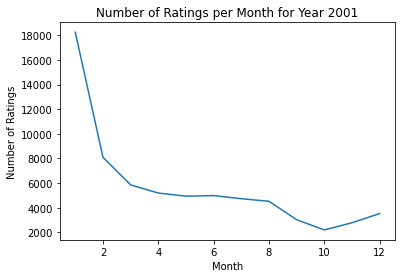

In [35]:
# Create a line plot of the ratings by month
plt.plot(ratings_by_month_2001.index, ratings_by_month_2001.values)

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Number of Ratings')
plt.title('Number of Ratings per Month for Year 2001')

# Display the plot
plt.show()

In [36]:
df_rating_2002 = df_rating.loc[df_rating["year"] == 2002]

In [37]:
ratings_by_month_2002 = df_rating_2002.groupby('month')['rating'].count()

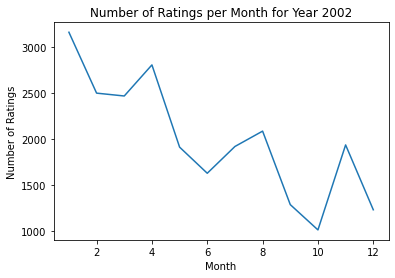

In [38]:
# Create a line plot of the ratings by month
plt.plot(ratings_by_month_2002.index, ratings_by_month_2002.values)

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Number of Ratings')
plt.title('Number of Ratings per Month for Year 2002')

# Display the plot
plt.show()

In [39]:
df_rating_2003 = df_rating.loc[df_rating["year"] == 2003]
ratings_by_month_2003 = df_rating_2003.groupby('month')['rating'].count()

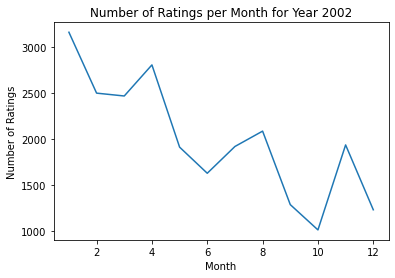

In [40]:
# Create a line plot of the ratings by month
plt.plot(ratings_by_month_2002.index, ratings_by_month_2002.values)

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Number of Ratings')
plt.title('Number of Ratings per Month for Year 2002')

# Display the plot
plt.show()

## Part 2: Analyzing User Data

In [41]:
df_user.head()

,user_id,gender,age,occupation,zipcode
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [42]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     6040 non-null   int64 
 1   gender      6040 non-null   object
 2   age         6040 non-null   int64 
 3   occupation  6040 non-null   int64 
 4   zipcode     6040 non-null   object
dtypes: int64(3), object(2)
memory usage: 236.1+ KB


In [43]:
print('Number of unique occupation:', df_user["occupation"].nunique())
print('Number of unique zipcodes:', df_user["zipcode"].nunique())
print('Gender distribution:\n', df_user['gender'].value_counts())

Number of unique occupation: 21
Number of unique zipcodes: 3439
Gender distribution:
 M    4331
F    1709
Name: gender, dtype: int64


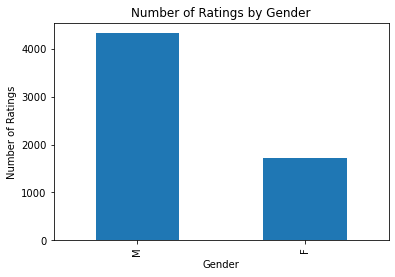

In [44]:
# Get the value counts for each gender
gender_counts = df_user['gender'].value_counts()

# Create a bar plot of the gender 
gender_counts.plot(kind='bar')

# Add labels and title
plt.xlabel('Gender')
plt.ylabel('Number of Ratings')
plt.title('Number of Ratings by Gender')

# Display the plot
plt.show()

## Part 3: Anaylzing Movie Data

In [45]:
df_movie.head()

,movie_id,title,genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [46]:
df_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  3883 non-null   int64 
 1   title     3883 non-null   object
 2   genre     3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


In [47]:
df_movie['release_year'] = df_movie['title'].str.extract("\((\d{4})\)", expand=True).astype(str)

In [106]:
df_movie.head()

,movie_id,title,genre,year,release_year
0,1,Toy Story (1995),Animation|Children's|Comedy,1995,1995
1,2,Jumanji (1995),Adventure|Children's|Fantasy,1995,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995,1995
3,4,Waiting to Exhale (1995),Comedy|Drama,1995,1995
4,5,Father of the Bride Part II (1995),Comedy,1995,1995


In [48]:
genre_lists = df_movie["genre"].str.split('|')

In [49]:
genre_lists

0        [Animation, Children's, Comedy]
1       [Adventure, Children's, Fantasy]
2                      [Comedy, Romance]
3                        [Comedy, Drama]
4                               [Comedy]
                      ...               
3878                            [Comedy]
3879                             [Drama]
3880                             [Drama]
3881                             [Drama]
3882                   [Drama, Thriller]
Name: genre, Length: 3883, dtype: object

In [50]:
genres = genre_lists.explode()

In [51]:
genres

0        Animation
0       Children's
0           Comedy
1        Adventure
1       Children's
           ...    
3879         Drama
3880         Drama
3881         Drama
3882         Drama
3882      Thriller
Name: genre, Length: 6408, dtype: object

In [52]:
unique_genres = genres.unique()

In [53]:
print("Unique genres: ", unique_genres)

Unique genres:  ['Animation' "Children's" 'Comedy' 'Adventure' 'Fantasy' 'Romance' 'Drama'
 'Action' 'Crime' 'Thriller' 'Horror' 'Sci-Fi' 'Documentary' 'War'
 'Musical' 'Mystery' 'Film-Noir' 'Western']


In [54]:
df_movie = df_movie.join(df_movie['genre'].str.get_dummies().astype(bool))
df_movie.drop('genre', inplace=True, axis=1)

In [55]:
df_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   movie_id      3883 non-null   int64 
 1   title         3883 non-null   object
 2   release_year  3883 non-null   object
 3   Action        3883 non-null   bool  
 4   Adventure     3883 non-null   bool  
 5   Animation     3883 non-null   bool  
 6   Children's    3883 non-null   bool  
 7   Comedy        3883 non-null   bool  
 8   Crime         3883 non-null   bool  
 9   Documentary   3883 non-null   bool  
 10  Drama         3883 non-null   bool  
 11  Fantasy       3883 non-null   bool  
 12  Film-Noir     3883 non-null   bool  
 13  Horror        3883 non-null   bool  
 14  Musical       3883 non-null   bool  
 15  Mystery       3883 non-null   bool  
 16  Romance       3883 non-null   bool  
 17  Sci-Fi        3883 non-null   bool  
 18  Thriller      3883 non-null   bool  
 19  War   

In [56]:
df_movie.head()

,movie_id,title,release_year,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),1995,False,False,True,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,Jumanji (1995),1995,False,True,False,True,False,False,False,...,True,False,False,False,False,False,False,False,False,False
2,3,Grumpier Old Men (1995),1995,False,False,False,False,True,False,False,...,False,False,False,False,False,True,False,False,False,False
3,4,Waiting to Exhale (1995),1995,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5,Father of the Bride Part II (1995),1995,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [57]:
print('Number of unique movie release years:', df_movie.release_year.nunique())

Number of unique movie release years: 81


In [58]:
print("Movie years: ", sorted(df_movie['release_year'].unique()))


Movie years:  ['1919', '1920', '1921', '1922', '1923', '1925', '1926', '1927', '1928', '1929', '1930', '1931', '1932', '1933', '1934', '1935', '1936', '1937', '1938', '1939', '1940', '1941', '1942', '1943', '1944', '1945', '1946', '1947', '1948', '1949', '1950', '1951', '1952', '1953', '1954', '1955', '1956', '1957', '1958', '1959', '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000']


In [59]:
movie_counts = df_movie['release_year'].value_counts().dropna().sort_index()

In [60]:
movie_counts

1919      3
1920      2
1921      1
1922      2
1923      3
       ... 
1996    345
1997    315
1998    337
1999    283
2000    156
Name: release_year, Length: 81, dtype: int64

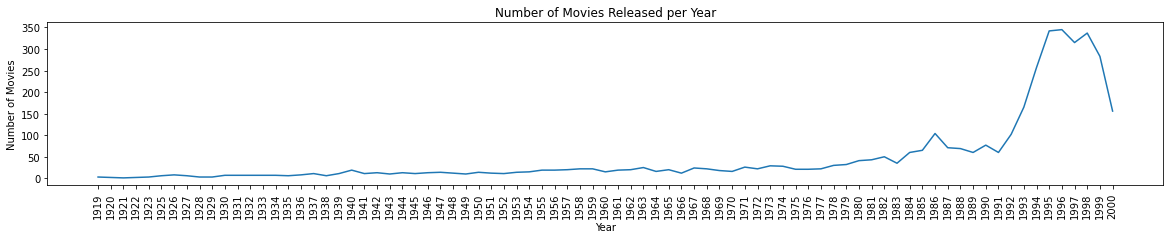

In [61]:
# set the figure size
plt.figure(figsize=(20, 3))

# create a line plot of movie counts by year
plt.plot(movie_counts.index, movie_counts.values)

# set the x-axis label
plt.xlabel('Year')

# set the y-axis label
plt.ylabel('Number of Movies')

# set the plot title
plt.title('Number of Movies Released per Year')


plt.xticks(rotation=90)

# display the plot
plt.show()

In [62]:
# get the count of each genre
genre_counts = df_movie.iloc[:, 3:].sum()

# print the genre counts
print(genre_counts)

Action          503
Adventure       283
Animation       105
Children's      251
Comedy         1200
Crime           211
Documentary     127
Drama          1603
Fantasy          68
Film-Noir        44
Horror          343
Musical         114
Mystery         106
Romance         471
Sci-Fi          276
Thriller        492
War             143
Western          68
dtype: int64


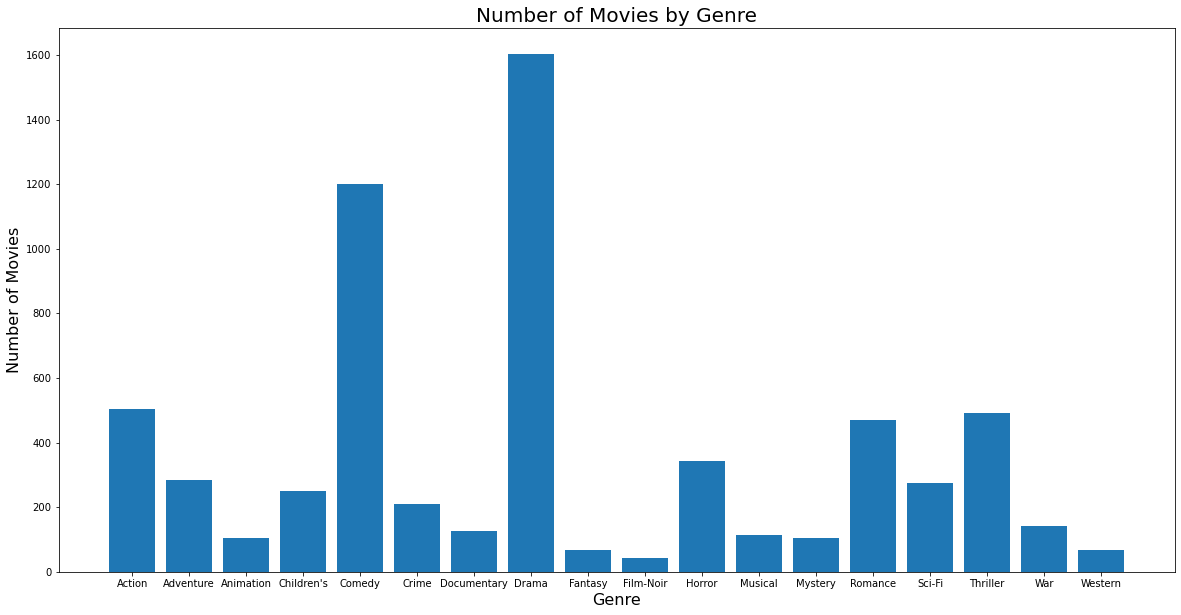

In [64]:
plt.figure(figsize=(20, 10))

# create a bar plot of the true counts for each genre
plt.bar(genre_counts.index, genre_counts.values)

# set the x-axis label
plt.xlabel('Genre', fontsize=16)

# set the y-axis label
plt.ylabel('Number of Movies', fontsize=16)

# set the plot title
plt.title('Number of Movies by Genre', fontsize=20)

# display the plot
plt.show()

In [136]:
df_rating_movie_merged = pd.merge(df_rating, df_movie, on='movie_id')

In [137]:
df_rating_movie_merged.head()

,user_id,movie_id,rating,timestamp,year,month,date,title,release_year,Action,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,1193,5,2000-12-31 17:12:40,2000,12,2000-12-31,One Flew Over the Cuckoo's Nest (1975),1975,False,...,False,False,False,False,False,False,False,False,False,False
1,2,1193,5,2000-12-31 16:33:33,2000,12,2000-12-31,One Flew Over the Cuckoo's Nest (1975),1975,False,...,False,False,False,False,False,False,False,False,False,False
2,12,1193,4,2000-12-30 18:49:39,2000,12,2000-12-30,One Flew Over the Cuckoo's Nest (1975),1975,False,...,False,False,False,False,False,False,False,False,False,False
3,15,1193,4,2000-12-30 13:01:19,2000,12,2000-12-30,One Flew Over the Cuckoo's Nest (1975),1975,False,...,False,False,False,False,False,False,False,False,False,False
4,17,1193,5,2000-12-30 01:41:11,2000,12,2000-12-30,One Flew Over the Cuckoo's Nest (1975),1975,False,...,False,False,False,False,False,False,False,False,False,False


In [138]:
df_rating_movie_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 27 columns):
 #   Column        Non-Null Count    Dtype         
---  ------        --------------    -----         
 0   user_id       1000209 non-null  int64         
 1   movie_id      1000209 non-null  int64         
 2   rating        1000209 non-null  int64         
 3   timestamp     1000209 non-null  datetime64[ns]
 4   year          1000209 non-null  int64         
 5   month         1000209 non-null  int64         
 6   date          1000209 non-null  object        
 7   title         1000209 non-null  object        
 8   release_year  1000209 non-null  object        
 9   Action        1000209 non-null  bool          
 10  Adventure     1000209 non-null  bool          
 11  Animation     1000209 non-null  bool          
 12  Children's    1000209 non-null  bool          
 13  Comedy        1000209 non-null  bool          
 14  Crime         1000209 non-null  bool          
 15

In [155]:
genre_columns = ['Action', 'Adventure', 'Animation', 'Children\'s', 'Comedy', 
                 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 
                 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']

In [156]:
data = []
for genre in genre_columns:
    avg_rating = df_rating_movie_merged[df_rating_movie_merged[genre] == True]['rating'].mean()
    data.append({'genre': genre, 'average_rating': avg_rating})

df_genre_ratings = pd.DataFrame(data)
print(df_genre_ratings)

          genre  average_rating
0        Action        3.491185
1     Adventure        3.477257
2     Animation        3.684868
3    Children's        3.422035
4        Comedy        3.522099
5         Crime        3.708679
6   Documentary        3.933123
7         Drama        3.766332
8       Fantasy        3.447371
9     Film-Noir        4.075188
10       Horror        3.215013
11      Musical        3.665519
12      Mystery        3.668102
13      Romance        3.607465
14       Sci-Fi        3.466521
15     Thriller        3.570466
16          War        3.893327
17      Western        3.637770


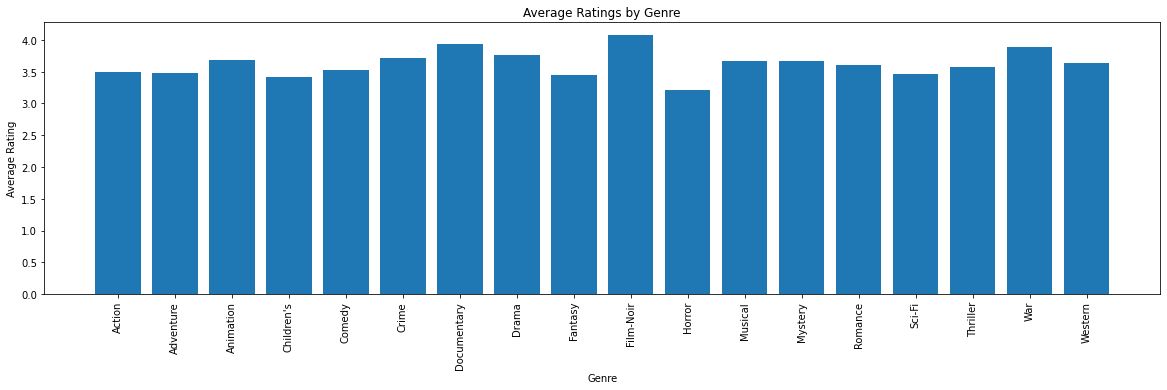

In [159]:
# Create a bar chart
plt.figure(figsize=(20, 5))

plt.bar(df_genre_ratings['genre'], df_genre_ratings['average_rating'])



# Set the title and axis labels
plt.title('Average Ratings by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Rating')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Display the chart
plt.show()

In [161]:
average_title_ratings = df_rating_movie_merged.groupby('title')['rating'].mean()

In [162]:
average_title_ratings

title
$1,000,000 Duck (1971)                        3.027027
'Night Mother (1986)                          3.371429
'Til There Was You (1997)                     2.692308
'burbs, The (1989)                            2.910891
...And Justice for All (1979)                 3.713568
                                                ...   
Zed & Two Noughts, A (1985)                   3.413793
Zero Effect (1998)                            3.750831
Zero Kelvin (Kjærlighetens kjøtere) (1995)    3.500000
Zeus and Roxanne (1997)                       2.521739
eXistenZ (1999)                               3.256098
Name: rating, Length: 3706, dtype: float64

In [163]:
df_rating_movie_merged['movie_id'].nunique()

3706

In [165]:
top_10_movies = average_title_ratings.nlargest(10)

In [166]:
top_10_movies

title
Baby, The (1973)                             5.0
Bittersweet Motel (2000)                     5.0
Follow the Bitch (1998)                      5.0
Gate of Heavenly Peace, The (1995)           5.0
Lured (1947)                                 5.0
One Little Indian (1973)                     5.0
Schlafes Bruder (Brother of Sleep) (1995)    5.0
Smashing Time (1967)                         5.0
Song of Freedom (1936)                       5.0
Ulysses (Ulisse) (1954)                      5.0
Name: rating, dtype: float64

In [167]:
average_title_ratings_more = df_rating_movie_merged.groupby('title').filter(lambda x: len(x) >= 10)

# Calculate the mean rating for each title
average_title_ratings_more = average_title_ratings_more.groupby('title')['rating'].mean()

In [169]:
top_10_movies_more = average_title_ratings_more.nlargest(10)

In [170]:
top_10_movies_more

title
Sanjuro (1962)                                                         4.608696
Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954)    4.560510
Shawshank Redemption, The (1994)                                       4.554558
Godfather, The (1972)                                                  4.524966
Close Shave, A (1995)                                                  4.520548
Usual Suspects, The (1995)                                             4.517106
Schindler's List (1993)                                                4.510417
Wrong Trousers, The (1993)                                             4.507937
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950)                          4.491489
Raiders of the Lost Ark (1981)                                         4.477725
Name: rating, dtype: float64